In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

import random

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

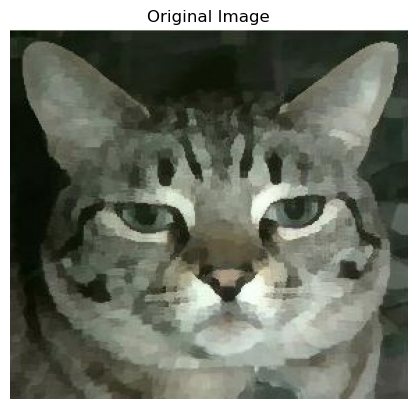

In [21]:
image = Image.open("catkuwahara.jpg").convert("RGB")
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [22]:
image_array = np.array(image)
height, width, _ = image_array.shape
data = image_array.reshape(-1, 3)

number_colors = 3
max_iterations = 300
tolerance = 0.001

In [23]:
centroids = {i: data[i] for i in range(number_colors)}
           
for i in range(max_iterations):
    previous = centroids.copy()
    classes = {i: [] for i in range(number_colors)}
    labels = []
                
    for point in data:
        distances = []
        for index in centroids:
            distance = np.linalg.norm(point-centroids[index])
            distances.append(distance)

        min_distance_index = distances.index(min(distances))
        classes[min_distance_index].append(point)
        labels.append(min_distance_index)
            
    for c in classes:
        if len(classes[c]) > 0:
            centroids[c] = np.average(classes[c], axis=0)
                
    optimal = True
    for c in centroids:
        if np.linalg.norm(centroids[c] - previous[c]) > tolerance:
            optimal = False
    if optimal:
        break

labels_ = np.array(labels)
cluster_centers_ = np.array([centroids[i] for i in range(number_colors)])

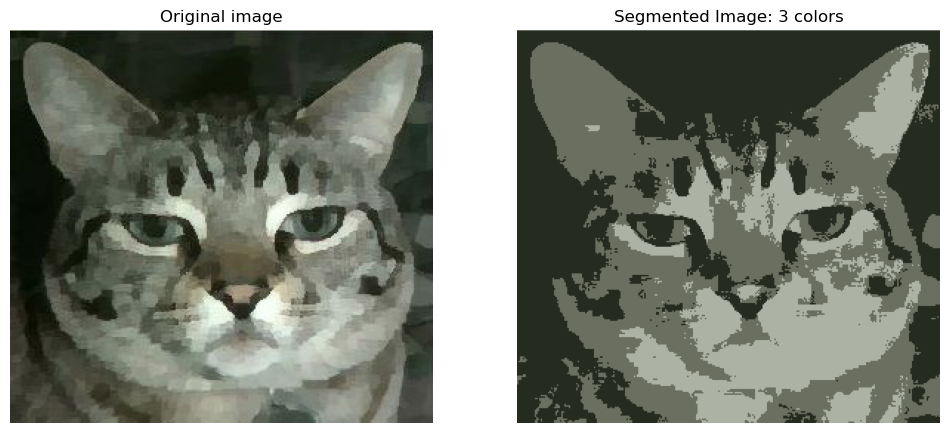

In [24]:
segmented_img = cluster_centers_[labels_]
segmented_img = segmented_img.reshape(image_array.shape).astype(np.uint8)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_img)
plt.title("Segmented Image: {} colors".format(number_colors))
plt.axis('off')

plt.show()

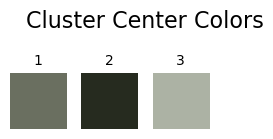


1) [106 111  96]
2) [38 43 31]
3) [172 178 164]


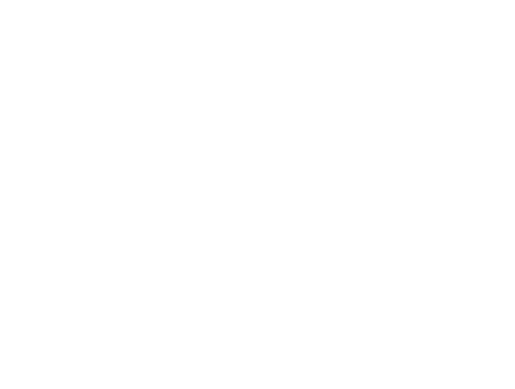

In [25]:
colors_per_row = 4
num_rows = math.ceil(number_colors / colors_per_row) 

plt.figure(figsize=(min(colors_per_row, number_colors) * 1, num_rows * 1.5))

for i in range(number_colors):
    row = i // colors_per_row
    col = i % colors_per_row
    plt.subplot(num_rows, colors_per_row, i + 1)
    
    color = cluster_centers_[i].astype(np.uint8)
    swatch = np.ones((50, 50, 3), dtype=np.uint8) * color

    plt.imshow(swatch)
    plt.title(f'{i + 1}', fontsize=10)
    plt.axis('off')

plt.suptitle("Cluster Center Colors", fontsize=16)
plt.tight_layout()
plt.show()

print()
for i in range(number_colors):
    color = cluster_centers_[i].astype(np.uint8)
    print(f'{i + 1}) {color}')
    plt.axis('off')
    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


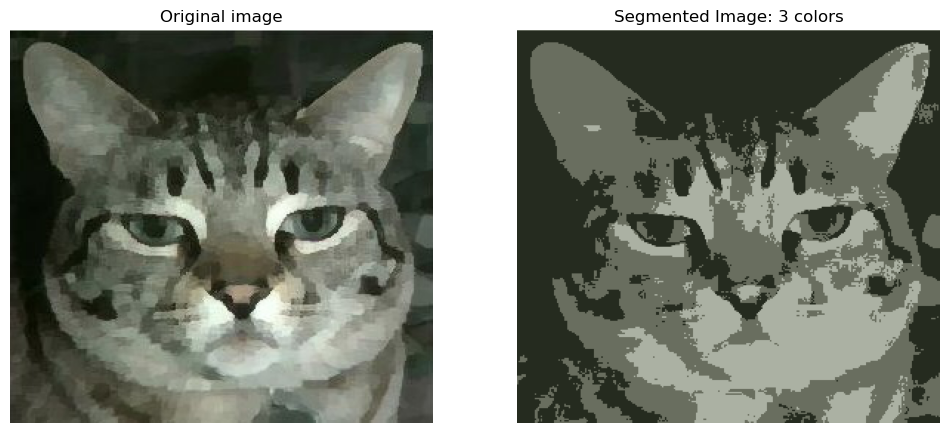

In [26]:
kmeans = KMeans(n_clusters=number_colors, random_state=0).fit(data)
seg = kmeans.cluster_centers_[kmeans.labels_]
seg = seg.reshape(image_array.shape).astype(np.uint8)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
plt.imshow(seg)
plt.title("Segmented Image: {} colors".format(number_colors))
plt.axis('off')

plt.show()

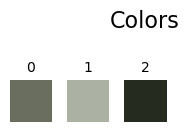


1) [105 110  95]
2) [171 177 163]
3) [37 43 31]


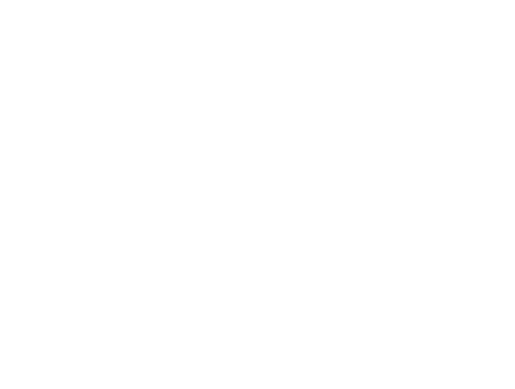

In [27]:
colors_per_row = 5
num_rows = math.ceil(number_colors / colors_per_row) 

plt.figure(figsize=(min(colors_per_row, number_colors) * 1, num_rows * 1.5))

for i in range(number_colors):
    row = i // colors_per_row
    col = i % colors_per_row
    plt.subplot(num_rows, colors_per_row, i + 1)
    
    color = kmeans.cluster_centers_[i].astype(np.uint8)
    swatch = np.ones((50, 50, 3), dtype=np.uint8) * color

    plt.imshow(swatch)
    plt.title(f'{i}', fontsize=10)
    plt.axis('off')

plt.suptitle("Colors", fontsize=16)
plt.tight_layout()
plt.show()

print()
for i in range(number_colors):
    color = kmeans.cluster_centers_[i].astype(np.uint8)
    print(f'{i + 1}) {color}')
    plt.axis('off')

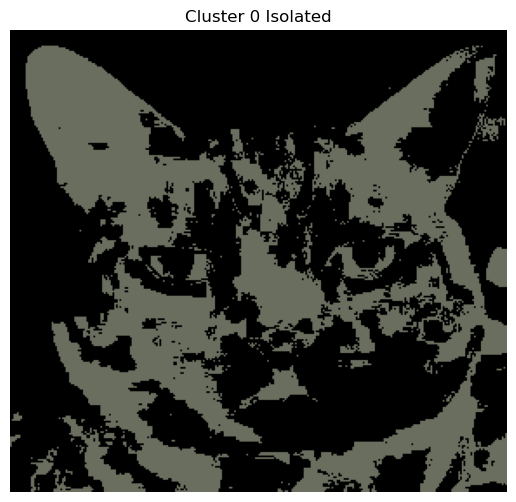

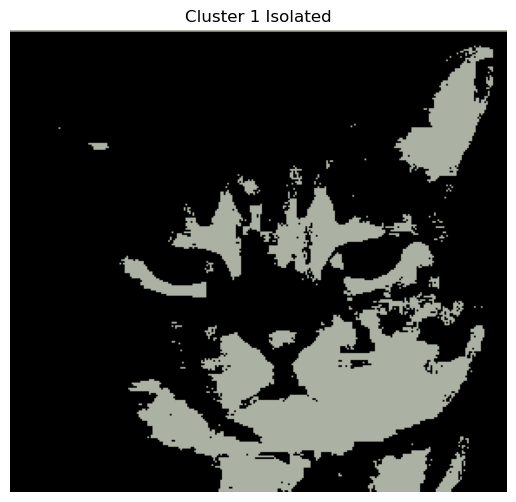

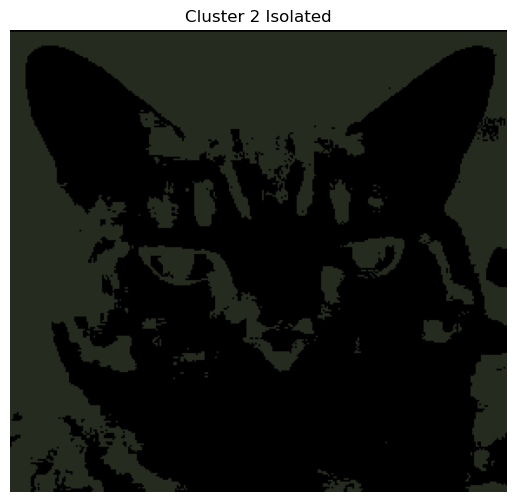

In [28]:
for i in range(number_colors):
    label_to_show = i
    isolated_image = np.zeros_like(image_array)

    mask = (kmeans.labels_ == label_to_show)
    isolated_image[mask.reshape(height, width)] = seg[mask.reshape(height, width)]

    plt.figure(figsize=(12, 6))

    plt.subplot(111)
    plt.imshow(isolated_image)
    plt.title(f"Cluster {label_to_show} Isolated")
    plt.axis('off')

    plt.show()

In [29]:
import json
filename = 'data.json'

data = {'image': segmented_img.tolist()}

with open(filename, 'w') as file:
    json.dump(data, file, indent=4)

In [30]:
segmented_img.tolist()

[[[172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178, 164],
  [172, 178,